In [1]:
!pip install selenium
!pip install bs4

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import selenium
from bs4 import BeautifulSoup
import requests

In [81]:

#The baseballsavant website would not allow for multiple seasons to be downloaded at one with a max of two
#All of this data is pre-filtered into home run events in order to make the dataset managable and not too large
df = pd.read_csv('Datasets/Home_Run_Data.csv')
mergeDF = pd.read_csv('Datasets/MergedHR.csv')

#Built-in function which allows for the data in each csv to be appended onto one another, increasing the amount of data
ans = pd.concat([df,mergeDF], ignore_index = True)
ans.dropna(axis = 1, how = 'all', inplace = True)
ans.head(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2022-10-05,89.2,2.43,5.40,"Vázquez, Christian",543877,674681,home_run,hit_into_play,...,0,0,3,3,0,Standard,Standard,135.0,0.061,1.029
1,SL,2022-10-05,91.1,-1.81,6.24,"Moreno, Gabriel",672515,657508,home_run,hit_into_play,...,0,4,0,4,0,Standard,Standard,191.0,-0.214,2.286
2,SI,2022-10-05,90.7,2.03,5.69,"Torrens, Luis",620443,641302,home_run,hit_into_play,...,3,3,4,4,3,Standard,Standard,151.0,0.333,1.835
3,FF,2022-10-05,93.6,-1.58,6.33,"Choi, Ji-Man",596847,601713,home_run,hit_into_play,...,3,2,3,2,3,Infield shift,Standard,203.0,-0.159,1.659
4,CU,2022-10-05,78.5,-1.77,5.39,"McCann, James",543510,607200,home_run,hit_into_play,...,0,0,9,9,0,Standard,Standard,58.0,0.020,1.995
5,FF,2022-10-05,91.2,-1.28,6.43,"Vavra, Terrin",679631,669952,home_run,hit_into_play,...,4,4,5,5,4,Standard,Standard,196.0,0.696,2.652
6,CH,2022-10-05,81.1,2.99,5.26,"Martinez, J.D.",502110,676596,home_run,hit_into_play,...,2,2,4,4,2,Standard,Standard,105.0,0.103,1.026
7,FC,2022-10-05,86.8,-1.94,5.73,"Villar, David",681584,489334,home_run,hit_into_play,...,1,3,1,3,1,Standard,Standard,194.0,-0.194,1.588
8,FC,2022-10-05,85.3,-0.78,6.43,"Isbel, Kyle",664728,650644,home_run,hit_into_play,...,6,2,6,2,6,Standard,Standard,136.0,-0.038,0.967
9,CU,2022-10-05,81.9,-1.44,5.73,"Heim, Jonah",641680,593334,home_run,hit_into_play,...,2,2,2,2,2,Infield shift,Standard,57.0,0.144,1.039


In [4]:
ans.keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'zone', 'des', 'game_type', 'stand', 'p_throws',
       'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls',
       'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b',
       'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x',
       'hc_y', 'fielder_2', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle',
       'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk',
       'pitcher.1', 'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5',
       'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 

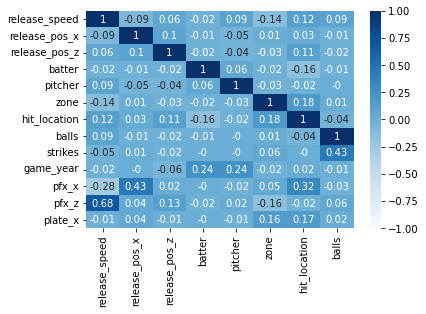

<Figure size 1800x720 with 0 Axes>

In [5]:
#Before we start, we want to see if there is a correlation between any variables
#Initially, there were too many variables to make the corr matrix readable, so we have to minimize 
corrMatrix = round(ans.corr(), 2)
corrMatrix = corrMatrix.loc['release_speed':'plate_x']
corrMatrix = corrMatrix[corrMatrix.columns[0:8]]

#This correlation matrix will show the dependency of variables within different categories
#The close the value to one, the more related the variables are to one another
sns.heatmap(corrMatrix, annot = True, vmin = -1, vmax = 1, cmap ='Blues')
plt.figure(figsize = (25,10))
plt.show()

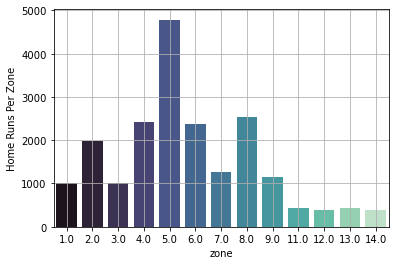

In [6]:
#Create a distribution plot of the amount of homeruns in a specific zone
sns.countplot(data = ans, x = 'zone', palette = 'mako')
plt.ylabel('Home Runs Per Zone')
plt.grid()
#As we can see below, the greatest number of homeruns occur in zone 5 which is in the middle of the strike zone

<AxesSubplot:xlabel='zone', ylabel='count'>

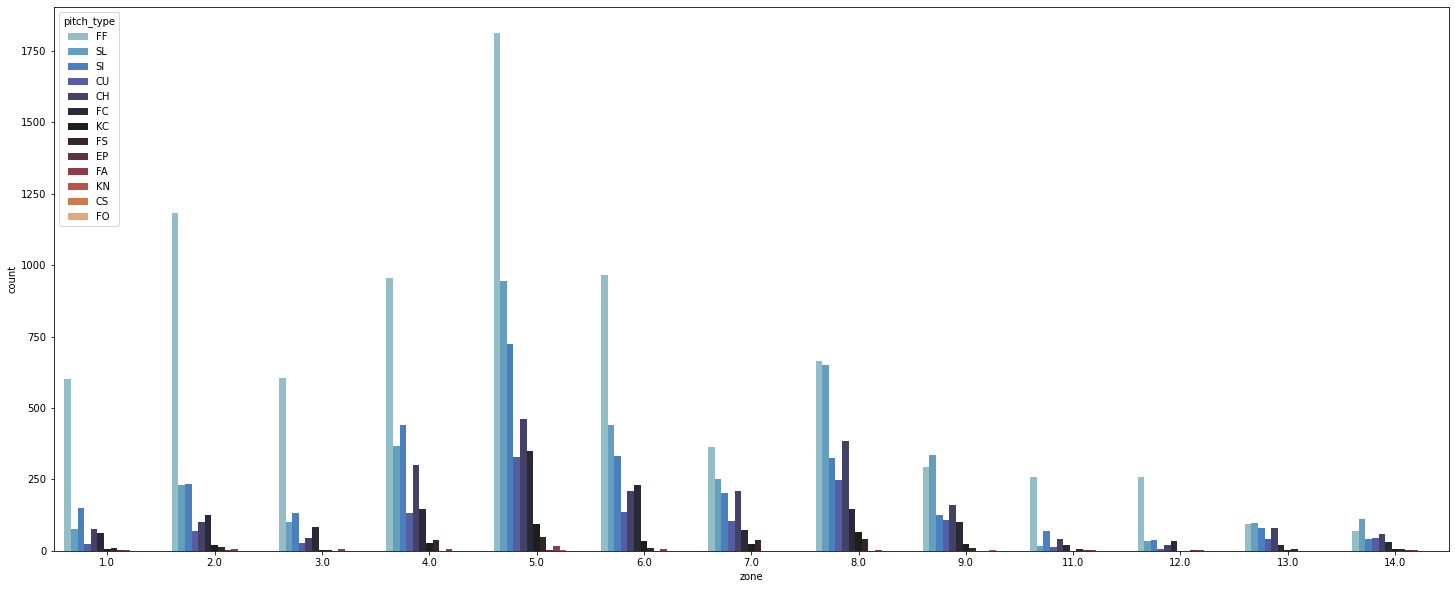

In [7]:
#Figure was too small and data was bunched up initially, so I increased the length and width of the plot
plt.figure(figsize = (25,10))
sns.countplot(data = ans, x = 'zone', palette = 'icefire', hue = 'pitch_type')
#With this graph we are able to determine the number of homeruns in each zone, corresponding to the specific type of pitch

In [8]:
def comparePlayers(df, playerName1, playerName2):
    
    #Creates two plots, sharing the same margin to give the user a comparison of baseball players
    fig, axes = plt.subplots(1, 2, figsize = (10,5), sharey = True)
    plt.subplots_adjust(hspace = None)

    #Removes the left spine of the plot as a lot of the data was on top of eachother
    sns.despine(left = True)
    
    #Distribution plot to break down the amount of homeruns in a specific zone
    sns.countplot(data = df[df['player_name'] == playerName1], x = 'zone', palette = 'icefire', ax = axes[0])
    axes[0].set_ylabel('Home Runs Per Zone')
    axes[0].set_title(f"Distribution of Home Runs for {playerName1}")
    
    #Distribution plot of the second player to show the amount of homeruns in a zone
    sns.countplot(data = df[df['player_name'] == playerName2], x = 'zone', palette = 'icefire', ax = axes[1])
    axes[1].set_ylabel("")
    axes[1].set_title(f"Distribution of Home Runs for {playerName2}")
    
    axes[0].grid()
    axes[1].grid()

    plt.show()
    

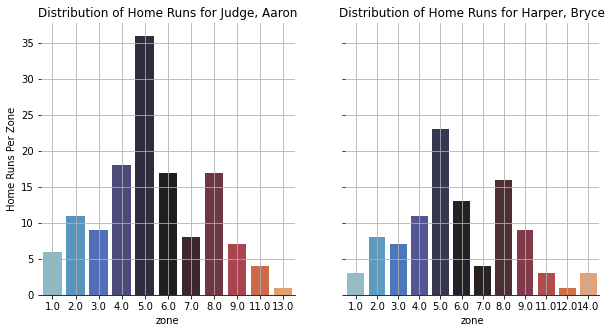

In [9]:
#Compare the number of hum runs for two players, sharing the y-axis to properly compare these two graphs
comparePlayers(ans,'Judge, Aaron','Harper, Bryce')

In [10]:
def homeRunsbyZone(df, playerName):
    '''
    Creates a dataframe, searching for the specific player name in the original data frame. For each zone and player
    in the dataframe, it will count the number of home runs. It will then filter by a specific player to return the final dataset
    Inputs: 
    df (pandas DataFrame): will subset the data to return a grouped dataframe given certain factors
    playerName (string): searches for a specific player within the dataframe
    '''
    
    #Calculates the number of homeruns per zone per player
    df2 = pd.DataFrame(ans.groupby(['zone','player_name'])['events'].agg('count'))
    #Renames the resulting column instead of having a generic 'count'
    df2.rename({'events':'Home Runs Per Zone'}, axis = 1, inplace = True)
    #Makes accessing individual elements easier
    df2.reset_index(inplace=True)
    #Filters by name to only get the data relevant to the player searched
    df2 = df2[(df2['player_name'] == playerName)]
    return df2

test = homeRunsbyZone(ans, 'Harper, Bryce')
test

,zone,player_name,Home Runs Per Zone
167,1.0,"Harper, Bryce",3
641,2.0,"Harper, Bryce",8
1132,3.0,"Harper, Bryce",7
1606,4.0,"Harper, Bryce",11
2223,5.0,"Harper, Bryce",23
2867,6.0,"Harper, Bryce",13
3375,7.0,"Harper, Bryce",4
3841,8.0,"Harper, Bryce",16
4343,9.0,"Harper, Bryce",9
4699,11.0,"Harper, Bryce",3


In [11]:
def plotHeatMap(df, playerName):
    
    #Checks the user input, seeing if any of the column names remotely match the playerName types in
    if df['player_name'].str.contains(playerName).any():
        #Only wants to gather the information for the strike zones(1-9)
        df = df[(df['player_name'].str.contains(playerName)) & (df['zone'].between(0,9))].reset_index().copy()
        playerName = df['player_name'].iloc[0]
    #An invalid player name is entered, which will essentially catch the error and return a print statement
    else:
        print("Please enter a valid player")
        return

    #Assign a cartesian coordinate system in order to gather the proper information with strike zones
    #This concept of cartesian coordinates was gathered from DataCamp
    def x_coord(col):
        if col['zone'] in [1,4,7]:
            return 1
        elif col['zone'] in [2,5,8]:
            return 2
        elif col['zone'] in [3,6,9]:
            return 3

    def y_coord(row):
        if row['zone'] in [1,2,3]:
            return 3
        elif row['zone'] in [4,5,6]:
            return 2
        elif row['zone'] in [7,8,9]:
            return 1
    
    
    #Assigns new columns with x and y coordinates in order to graph the heatmap of homeruns
    df['xcoord'] = df.apply(x_coord, axis = 1)
    df['ycoord'] = df.apply(y_coord, axis = 1)

    #Using seaborn, creates a histogram plot (heatmap) with a bar for the user to translate the color on the screen with a number
    ax = sns.histplot(data = df, x  = 'xcoord', y = 'ycoord', discrete = True, cmap ='Reds',cbar = True)
    #Removes the left and bottom spine of the graph
    sns.despine(left=True, bottom = True)
    #Removes the x and y ticks from the graphs
    ax.set(yticks=[], xticks = [])
    ax.set_xlabel('Zone')
    ax.set_ylabel("")
    ax.set_title(f"Home Run Distribution for {playerName}")
    
    #Count initializes in order to for the strike zone to be illustrated by the graph
    count = 0
    
    #Iterates through the cartesian plane (x and y axis to annotate the heatmap with the strikezones)
    
    for y in range(1, 4):
        for x in range(1,4):
            count += 1
            plt.text(x, y, count, horizontalalignment='center', size='medium', color='grey', weight='heavy')
    plt.show()

    

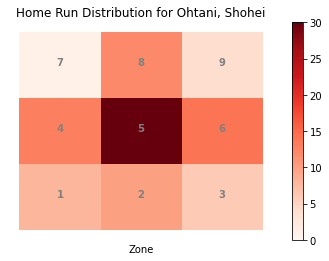

In [12]:
plotHeatMap(ans, 'Shohei')

In [13]:
#How does a player's launch speed and distance change throughout the seasons (2019-2022)
def launchOverTimeTop(df, top):
    #For each player, we want to gather the total number of homeruns
    top10Hitters = pd.DataFrame(df.groupby('player_name')['events'].agg('count'))
    #Renaming the column to make accessing the elements easier
    top10Hitters.rename({'events':'Home Runs'}, axis = 1, inplace = True)
    top10Hitters.reset_index(inplace=True)
    
    #Since we want to gather the top players, we want a descending order of values based on user input
    top10Hitters = top10Hitters.sort_values(by = 'Home Runs', ascending = False).head(top)
    
    #Creates a subplot with two rows each, with the number of columns depending on user input
    fig, axes = plt.subplots(2, top // 2, figsize = (20,5), sharey = True)

    #Getting an inner join in order to gather all of the information based on the top n players
    updated = pd.merge(ans, top10Hitters, how = 'inner')
    
    names = []
    
    #Gathers each name for the top n players
    for ind in updated.index:
        names.append(updated['player_name'][ind])
    
    #Makes sure that each name in the list is unique for indexing purposes
    names = list(set(names))
    
    
    for i, ax in zip(range(top), axes.ravel()):
        plt.tick_params(labelbottom = False,bottom = False)
        newdata = df[df['player_name'] == names[i]]
        sns.lineplot(data = newdata, x = 'game_date', y = 'launch_speed', hue = 'player_name', ax = ax)
        ax.xaxis.set_ticklabels([])

    plt.show()


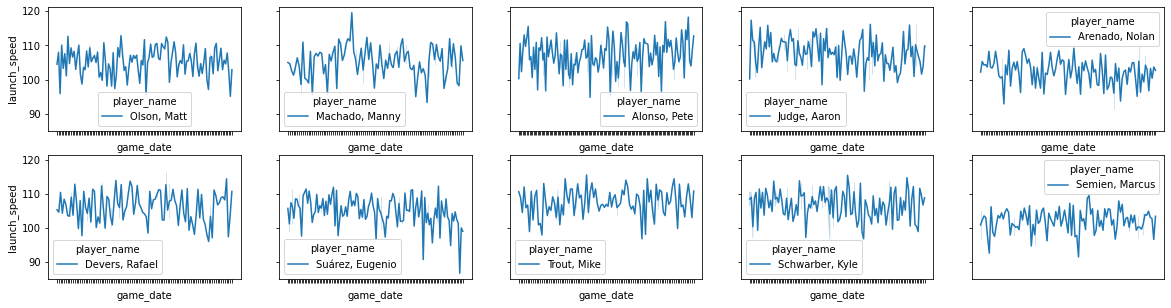

In [14]:
launchOverTimeTop(ans, 10)

# Working with PyBaseball

In [15]:
import pybaseball as pyb

Gathering player lookup table. This may take a moment.
Gathering Player Data


C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


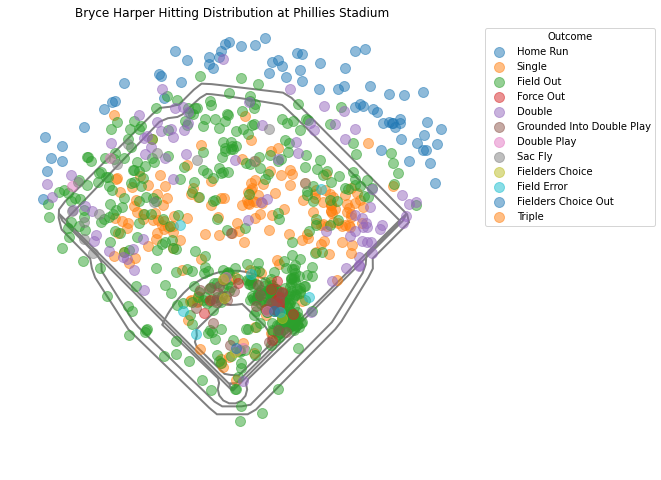

In [16]:
def scatterField(last, first, beginDate, endDate, stadium):
    #Gathers the ID of the player typed in by the user, this is helpful in gathering their hit data
    pid = pyb.playerid_lookup(last,first)['key_mlbam'].values[0]
    #Gathers the information of a player given a specific date
    data = pyb.statcast_batter(beginDate, endDate, pid)
    #Creates a chart of the baseball stadium, displaying the type of hit and the play it resulted in
    pyb.spraychart(data, title = f"{first.capitalize()} {last.capitalize()} Hitting Distribution at {stadium.capitalize()} Stadium", team_stadium = stadium)

scatterField('harper', 'bryce', '2017-05-01', '2019-07-01',  'phillies')

This is a large query, it may take a moment to complete


C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


100%|██████████| 460/460 [02:10<00:00,  3.53it/s]
C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


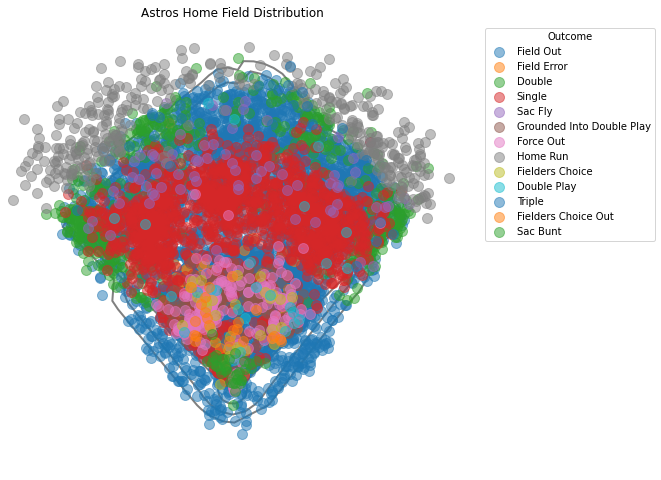

In [17]:
#Gets the information for the entire Houston Astro's team for the 2021-2022 season
teamData = pyb.statcast("2021-04-01","2022-10-31", team = 'HOU')
#Want to see the entire hit distribution for the Astro's in their home field
pyb.spraychart(teamData, 'astros', title = 'Astros Home Field Distribution', colorby = 'events')
plt.show()

Gathering Player Data


C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\utils.py:224: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))
C:\Users\zhrac\anaconda3\lib\site-packages\pybaseball\utils.py:224: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(data.text))


<AxesSubplot:xlabel='launch_speed', ylabel='launch_angle'>

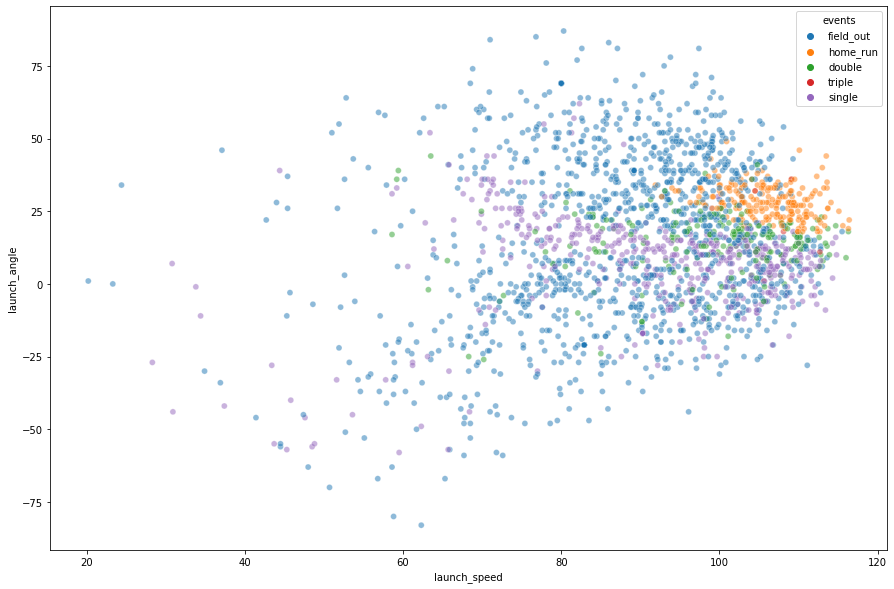

In [18]:
#Home Run Rate by Speed and Pitch Type
#Graph launch angle by exit velocity
#Want to see the information of Bryce Harper for most of his career (2010-2021)
pid = pyb.playerid_lookup('harper','bryce')['key_mlbam'].values[0]
bryceHarper = pyb.statcast_batter('2010-08-30', '2021-08-30', pid)

#Gather only the relevant information, the relationship between launch angle and speed
bryceHarper = bryceHarper[['launch_angle', 'launch_speed', 'pitch_name', 'events']]
#Get rid of all the NaN values, which help ensure all the points on the graph are relevant
bryceHarper.dropna(axis = 0, inplace = True)
plt.figure(figsize = (15,10))

#Previously, plotting the graph showed too many datapoints and clustered the graph
#This specifies the events of the points that we want included within the graph
bryceHarper = bryceHarper[(bryceHarper['events'] == 'home_run') | (bryceHarper['events'] == 'double')| 
            (bryceHarper['events'] == 'single') | (bryceHarper['events'] == 'field_out')|
            (bryceHarper['events'] == 'triple')]
#Plot the relationship between launch speed and angle for each type of 'event'
sns.scatterplot(data = bryceHarper, x = 'launch_speed', y = 'launch_angle', hue = "events", alpha = .5)


In [19]:
#Helps us gather information about the type of events that are plotted by the graph
bryceHarper.groupby('events')['events'].count()

events
double        202
field_out    1284
home_run      206
single        468
triple          7
Name: events, dtype: int64

***

### As we can see from the graph above, for Bryce Harper, if the ball is hit at an angle of 25 degrees with a velocity of 100-120mph, it is most likely to be a homerun. On the other hand, we can conclude a ball strike at a high angle (50-75 degrees) will mosty likely result in a field out

***

# Webscraping

In [20]:
weblink = "https://www.spotrac.com/mlb/rankings/2020/salary/"
response = requests.get(weblink)
read_text = response.text

#Create an instance of the BeautifulSoup class in order to begin the webscraping process
soup = BeautifulSoup(read_text)

#Gathers all of the hyperlinks from the websites  (href = True) and prints the titles of them through the .text
for x in soup.find_all('a', href = True):
    print(x.text.strip())




PREMIUM
Sign In
Register

NFL
Team Salary Caps
Positional Spending
Contracts
Salary Rankings
Free Agents

Trackers & Tools
» Market Values
» Fines/Suspensions
» IR Tracker
» Depth Charts Tracker
» Draft Tracker
» Options
» College Tracker
Best Values
Transactions

NBA
Team Cap Tracker
Positional Payrolls
Contracts
Salary Rankings
Free Agents

Trackers & Tools
» Depth Charts
» Options
» Fines/Suspensions
» Draft Tracker
» College Tracker
» Awards Tracker
Best Values

Transactions
» Recent Transactions
» Extensions
» Trades

MLB
Team Payrolls
Luxury Tax Tracker
Positional Payrolls
Contracts
Salary Rankings
Free Agents
Prospects

Trackers & Tools
» Fines/Suspensions
» Injured List Tracker
» Options Tracker
» Trade Tracker
» Arbitration Tracker
Best Values
Transactions

NHL
Team Salary Caps
Positional Payrolls
Contracts
Salary Rankings
Free Agents

Trackers & Tools
» IR Tracker
» Options
» Fines/Suspensions
» Draft Tracker
» Trade Tracker
» College/Junior Team Tracker
» Country Tracker


In [21]:
#Gets the title of the website
print(soup.title.text + '\n')

#Prints the first paragraph of text with the website
print(soup.find('p').text + '\n')

#Find the first heading in the website
print(soup.find('h1').text + '\n')

#Finds the children of the entire website (which can be seen as HTML)
print(soup.contents[0].upper())

MLB Salary Rankings | Spotrac

When you visit any web site, it may store or retrieve information on your browser, mostly in the form of cookies. This information might be about you, your preferences or your device and is mostly used to make the site work as you expect it to. The information does not usually directly identify you, but it can give you a more personalised web experience. Because we respect your right to privacy, you can choose not to allow some types of cookies. Click on the different category headings to find out more and change our default settings. However, blocking some types of cookies may impact your experience of the site and the services we are able to offer.

MLB Financial Rankings

HTML


# Beautiful Soup Implementation

In [22]:
#Since a lot of the page begins to load in as we scroll through the page, we need this to gather all of the information
response = requests.post(weblink, data={'ajax': 'true','mobile': 'false'}).content

soup = BeautifulSoup(response)

#Tr tags in html establish rows of a table. Therefore, we need to find these rows in the table to properly scrape the data
column_headers = soup.find_all('tr')[0]

#Goes through all of the header cells and formats them correctly to score them in the table
column_headers = [i.text.strip().title() for i in column_headers.find_all('th')]
column_headers = column_headers[1:]

#This accesses each block or row of the players in the website
baseballPlayers = soup.find_all('tr')[1:]

playerName = []
position = []
age = []
salary = []
team = []

#Iterate through all of the baseball players and store their information in the table
for player in baseballPlayers:
    #Accesses all h3 href attributes in order to properly find the player name
    playerName.append(player.h3.a.text)
    #Looks for the center small class which is where the position of the player is found
    position.append(player.find('td', class_ = 'center small').text.strip())
    #Finds the salary and gets rid of the dollar sign because we want to convert this to a numeric type later
    salary.append(player.find('span', class_ = 'info').text.strip().replace('$',""))
    #Looks for each div tag with the specific class and formats correctly
    team.append(player.find('div', class_ = 'rank-position').text.strip())
    #There are two types of center small classes, so we have to access the number attributes to gather the age
    for ages in player.find_all("td", {"class": "center small"}):
        plainText = ages.text.strip()
        
        #If its numeric, we know that it is for the age
        if(plainText.isnumeric()):
            age.append(plainText)

#Formats all of the data in the list into a pandas dataframe to gather all of the information properly
playerData = pd.DataFrame({"Player": playerName, 'Team': team, 'Age':age,"Position" : position, "Salary": salary})
playerData

,Player,Team,Age,Position,Salary
0,Mike Trout,LAA,28,CF,"37,766,667"
1,Gerrit Cole,NYY,29,SP,"36,000,000"
2,Max Scherzer,WSH,35,SP,"35,920,616"
3,Nolan Arenado,COL,29,3B,"35,025,000"
4,Stephen Strasburg,WSH,31,SP,"35,000,000"
...,...,...,...,...,...
995,Anthony Bemboom,LAA,30,C,"563,500"
996,Jesus Luzardo,OAK,22,SP,"563,500"
997,Vimael Machin,OAK,26,2B,"563,500"
998,Pavin Smith,ARI,24,1B,"563,500"


# Pandas Implementation

In [23]:
#Downside only accesses the first 100 rows
#Since the rest of the data must be accesses by scrolling, if you wanted to use pandas read_html function you would
#have to use selenium to figure the rest out
dfs = pd.read_html(weblink, header = 0)[0].reset_index()

#Only accesses the relevant attributes from the dataframe
dfs = dfs[['Player','POS','Age','salary']]

#Converts all of the columns to titlecase
dfs.columns = dfs.columns.str.title()
#gets rid of all NaN values
dfs.dropna(inplace = True)

#Ensures that the team will be accesses instead of a player column with the team attached to the end of the player name
dfs['Team'] = dfs['Player'].str.split(" ", n = 2, expand = True)[2]
dfs['Player'] = dfs['Player'].str[:-4]
dfs

,Player,Pos,Age,Salary,Team
0,Mike Trout,CF,28,"$37,766,667",LAA
1,Gerrit Cole,SP,29,"$36,000,000",NYY
2,Max Scherzer,SP,35,"$35,920,616",WSH
3,Nolan Arenado,3B,29,"$35,025,000",COL
4,Stephen Strasburg,SP,31,"$35,000,000",WSH
...,...,...,...,...,...
95,Marcus Semien,SS,29,"$13,000,000",OAK
96,Tyler Chatwood,SP,30,"$13,000,000",CHC
97,Will Smith,RP,30,"$13,000,000",ATL
98,Jose Abreu,1B,33,"$12,781,666",CHW


In [24]:
#Want to scrape 25 pages from the 2020 season to compare players and salary
hitData = pd.DataFrame()

#Want to scrape all of the 25 pages from the MLB database
link = "https://www.mlb.com/stats/doubles/2020"
for i in range(2, 25):
    r = requests.get(link)
    #Keeps adding rows to the dataframe column with each page
    hitData = pd.concat([hitData, (pd.read_html(r.text, header = 0)[0])])
    link = f"https://www.mlb.com/stats/doubles/2020?page={i}"

#Resets the index to make accessing elements easier
hitData = hitData.reset_index()
hitData.drop('index', axis = 1, inplace = True)

#Renaming all of the columns to get rid of an errors that may have been produced with webscraping
column_headers = ['Player', 'Team', 'Games Played', 'At Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'RBIs',
                 'Walks','Strikeouts', 'Stolen Bases', 'Caught Stealing', 'Batting Average', 'On Base Percentage', 
                 'Slugging Percentage', 'On Base Plus Slugging']

hitData.columns = column_headers

#Wants to split the player column with any capital letters that it may find
replaceNames = hitData['Player'].str.findall('[A-Z][^A-Z]*')

playerNames = []

#Appends each name in the list with the first and last name, assigning it to the new Player column
for names in replaceNames:
    playerNames.append(names[0] + " " + names[2])
    
hitData['Player'] = playerNames
hitData

,Player,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,RBIs,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging
0,Freddie Freeman,ATL,60,214,51,73,23,1,13,53,45,37,2,0,0.341,0.462,0.640,1.102
1,Dominic Smith,NYM,50,177,27,56,21,1,10,42,14,45,0,0,0.316,0.377,0.616,0.993
2,Cesar Hernández,CLE,58,233,35,66,20,0,3,20,24,57,0,0,0.283,0.355,0.408,0.763
3,Christian Walker,AZ,57,218,35,59,18,1,7,34,19,50,1,1,0.271,0.333,0.459,0.792
4,Jose Iglesias,BAL,39,142,16,53,17,0,3,24,3,17,0,0,0.373,0.400,0.556,0.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Brian Navarreto,MIA,2,5,0,2,0,0,0,0,0,1,0,0,0.400,0.400,0.400,0.800
571,Hector Neris,PHI,24,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000
572,John Nogowski,STL,1,4,0,1,0,0,0,0,0,1,0,0,0.250,0.250,0.250,0.500
573,Aaron Nola,PHI,12,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000


In [25]:
#Inner join to add the salary column to properly make calculations on the data
overallData = pd.merge(playerData, hitData, on = ['Player','Team'], how = 'inner')

#Convert the salary column to a float to make performing calulations on easier
overallData['Salary'] = overallData['Salary'].str.replace(',', "").astype(float)
overallData

,Player,Team,Age,Position,Salary,Games Played,At Bats,Runs,Hits,Doubles,...,Home Runs,RBIs,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging
0,Mike Trout,LAA,28,CF,37766667.0,53,199,41,56,9,...,17,46,35,56,1,1,0.281,0.390,0.603,0.993
1,Nolan Arenado,COL,29,3B,35025000.0,48,182,23,46,9,...,8,26,15,20,0,0,0.253,0.303,0.434,0.737
2,Manny Machado,SD,27,3B,32000000.0,60,224,44,68,12,...,16,47,26,37,6,3,0.304,0.370,0.580,0.950
3,Miguel Cabrera,DET,37,DH,30000000.0,57,204,28,51,4,...,10,35,24,51,1,0,0.250,0.329,0.417,0.746
4,Jose Altuve,HOU,30,2B,29000000.0,48,192,32,42,9,...,5,18,17,39,2,3,0.219,0.286,0.344,0.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Andrew Stevenson,WSH,26,OF,563500.0,15,41,11,15,7,...,2,12,5,11,2,0,0.366,0.447,0.732,1.179
342,Jonah Heim,OAK,25,C,563500.0,13,38,5,8,0,...,0,5,3,3,0,0,0.211,0.268,0.211,0.479
343,Jake Lamb,OAK,29,1B,563500.0,31,88,7,17,5,...,3,10,8,25,0,1,0.193,0.283,0.352,0.635
344,Anthony Bemboom,LAA,30,C,563500.0,21,48,9,10,1,...,3,5,7,13,0,1,0.208,0.328,0.417,0.745


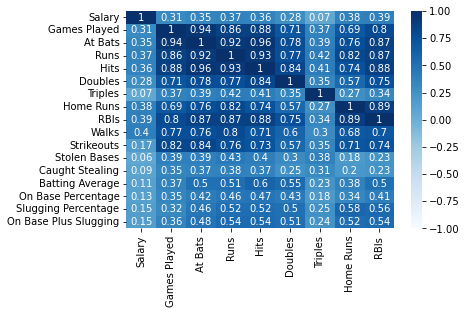

<Figure size 1800x720 with 0 Axes>

In [26]:
corrMatrix = round(overallData.corr(), 2)
corrMatrix = corrMatrix[corrMatrix.columns[0:9]]

#This correlation matrix will show the dependency of variables within different categories
#The close the value to one, the more related the variables are to one another
sns.heatmap(corrMatrix, annot = True, vmin = -1, vmax = 1, cmap ='Blues')
plt.figure(figsize = (25,10))
plt.show()

In [27]:
#Function that finds the pairwise correlations of all columns in a pd datadrame
#Excudes all non numeric data. 

print(overallData.corr())

                         Salary  Games Played   At Bats      Runs      Hits  \
Salary                 1.000000      0.308075  0.353240  0.373248  0.358695   
Games Played           0.308075      1.000000  0.940563  0.863099  0.881132   
At Bats                0.353240      0.940563  1.000000  0.920876  0.958334   
Runs                   0.373248      0.863099  0.920876  1.000000  0.930276   
Hits                   0.358695      0.881132  0.958334  0.930276  1.000000   
Doubles                0.283433      0.711169  0.781460  0.769217  0.842674   
Triples                0.065677      0.374089  0.390231  0.419049  0.410811   
Home Runs              0.383861      0.691821  0.761142  0.824027  0.743007   
RBIs                   0.393610      0.802296  0.870598  0.871560  0.879158   
Walks                  0.395302      0.765822  0.758614  0.795642  0.708329   
Strikeouts             0.173917      0.820128  0.844268  0.760429  0.730498   
Stolen Bases           0.056681      0.386805  0.394

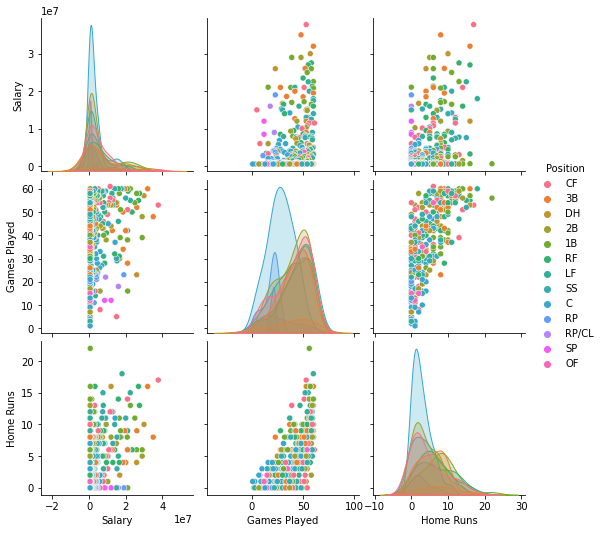

In [28]:
sns.pairplot(overallData, vars=['Salary', 'Games Played', 'Home Runs'], hue='Position')

<Figure size 1152x720 with 0 Axes>

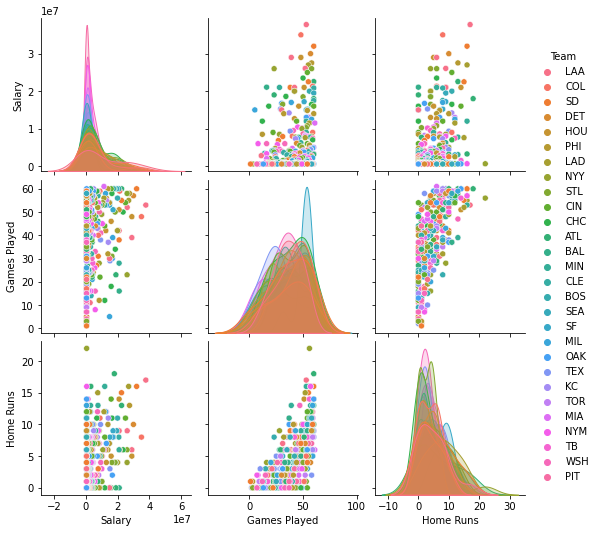

In [29]:
plt.figure(figsize=(16,10))
sns.pairplot(overallData, vars=['Salary', 'Games Played', 'Home Runs'], hue='Team')

<AxesSubplot:xlabel='Team', ylabel='Salary'>

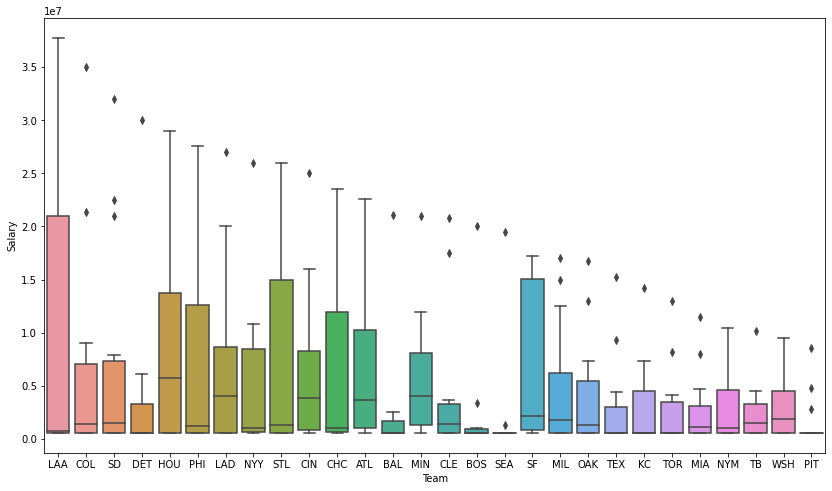

In [30]:
#Box plots that visualize spending across all teams
plt.figure(figsize=(14,8))
sns.boxplot(data=overallData, x='Team', y='Salary')

<AxesSubplot:xlabel='Position', ylabel='Salary'>

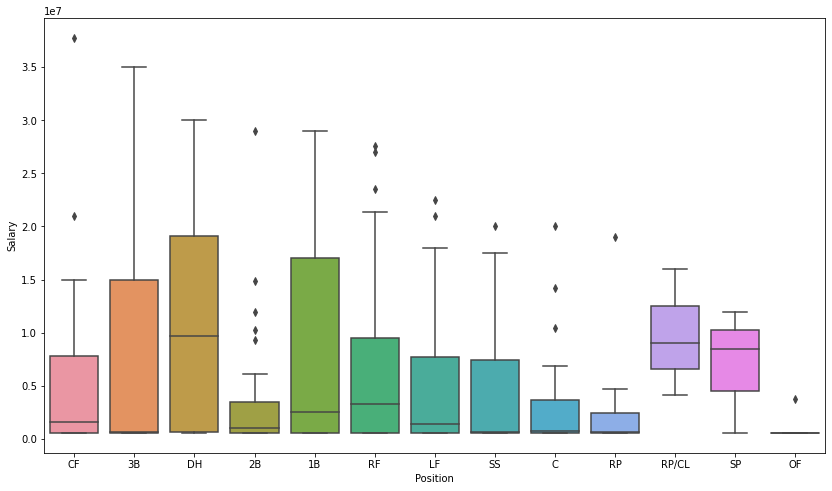

In [31]:
plt.figure(figsize=(14,8))
sns.boxplot(data=overallData, x='Position', y='Salary')

### Creating a linear regression model that shows the correlation between a player's salary and the amount of home runs they get

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = overallData['Home Runs'].values.reshape(-1,1)
Y = overallData['Salary'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Defines and builds the model
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [33]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(Y_test, Y_pred))

Coefficients: [[575602.16688034]]
Intercept: [2343331.94165352]
Mean Squared Error (MSE): 43516971087061.97
Coefficient of determination (R^2): 0.25


<function matplotlib.pyplot.show(close=None, block=None)>

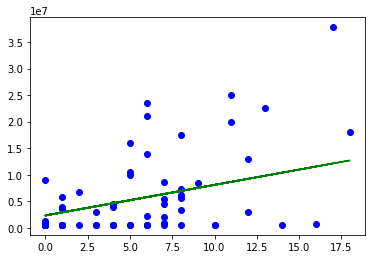

In [34]:
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, Y_pred, color ='g')
plt.show

### As we can see from this graph, there is a large correlation between a player's salary and their hitting statistics. The largest correlation is between salary and RBIs. Now, we will examine specifically their relationship, specifically in the form of a Linear Regression model

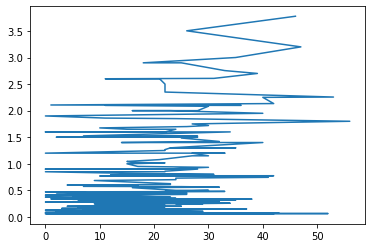

Index(['Player', 'Team', 'Age', 'Position', 'Salary', 'Games Played',
       'At Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'RBIs',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Caught Stealing',
       'Batting Average', 'On Base Percentage', 'Slugging Percentage',
       'On Base Plus Slugging'],
      dtype='object')

In [35]:
plt.plot(overallData['RBIs'], overallData['Salary']/1e7)
plt.show()
overallData.keys()

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X = overallData[['Runs','Hits','Doubles','Triples','Home Runs', 'RBIs']]
y = overallData['Salary'].values.reshape(-1,1)

clf = SGDClassifier(max_iter = 1000)
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# #Hyperparameter Tuning
# grid = {
#     'alpha': [1e-4, 1e-3, 1e-2, 1e-1], # learning rate
#     'loss': ['log', 'squared_error'], # logistic regression,
#     'penalty': ['l2', 'l1'],
#     'n_jobs': [-1]
# }

# gs = GridSearchCV(clf, param_grid = grid, cv=10)
# g_res = gs.fit(x_train, y_train.ravel())
# g_res.best_params_

In [42]:
#Using these hyperparameters, we will no fit our model with these parameters
clf = SGDClassifier(alpha = .1, loss = 'log', n_jobs = -1, penalty = 'l2')
#We will fit the model with the training data through the train_test_split functionality
clf.fit(x_train.values, y_train.ravel())
#Gettings the score/R^2 value of the line of best fit
clf.score(x_test.values, y_test)

0.0673076923076923

In [43]:
#Predicting the salary for 20 Runs, Hits, Doubles, Triples, Home Runs, RBIs
print(clf.predict([[20,20,20,20,20,20]]))

#Predicting the salary for 5 Runs, 10 Hits, 4 Doubles, 3 Triples, 1 Home Run, and 0 RBIs
print(clf.predict([[5,10,4,2,1,1]]))

[22500000.]
[563500.]


# Linear Regression

0.2395170881202353


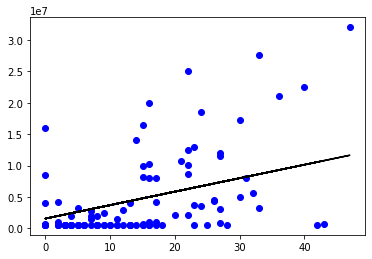

In [44]:
X = overallData['RBIs'].values.reshape(-1,1)
y = overallData['Salary'].values.reshape(-1,1)

x_train, x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

clf = LinearRegression()
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

y_pred = clf.predict(x_test)
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')

In [45]:
rbiRang = np.arange(1,20)

for rbis in rbiRang:
    print(f"Player hitting {rbis} RBI(s) predicted salary is {clf.predict([[rbis]])[0][0]}")

Player hitting 1 RBI(s) predicted salary is 1787706.328711802
Player hitting 2 RBI(s) predicted salary is 2001898.3046757649
Player hitting 3 RBI(s) predicted salary is 2216090.2806397276
Player hitting 4 RBI(s) predicted salary is 2430282.256603691
Player hitting 5 RBI(s) predicted salary is 2644474.232567654
Player hitting 6 RBI(s) predicted salary is 2858666.2085316167
Player hitting 7 RBI(s) predicted salary is 3072858.1844955795
Player hitting 8 RBI(s) predicted salary is 3287050.1604595426
Player hitting 9 RBI(s) predicted salary is 3501242.136423506
Player hitting 10 RBI(s) predicted salary is 3715434.1123874686
Player hitting 11 RBI(s) predicted salary is 3929626.0883514313
Player hitting 12 RBI(s) predicted salary is 4143818.0643153945
Player hitting 13 RBI(s) predicted salary is 4358010.040279358
Player hitting 14 RBI(s) predicted salary is 4572202.01624332
Player hitting 15 RBI(s) predicted salary is 4786393.992207283
Player hitting 16 RBI(s) predicted salary is 5000585.9681

### Even though the model is not very accurate, we can see a trend in the data. As the number of RBIs hit by a player increases their predicted salary increases. This makes sense as the players that are most active in the game are more likely to receive a higher salary. The Linear Regression model is more accurate compared to the SGDClassifier Model

# Machine Learning + Model Comparisons

In [56]:
!pip install statsmodels
from statsmodels.formula.api import ols
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline

import statsmodels.api as sm

  Using cached dython-0.7.2-py3-none-any.whl (22 kB)


ContextualVersionConflict: (psutil 5.8.0 (c:\users\zhrac\anaconda3\lib\site-packages), Requirement.parse('psutil>=5.9.1'), {'dython'})

## Multiclass Classification Model to predict what region a given MLB team is from
Using annual information that does not immediately give away what region a team is from, like attendance, games played, wins, etc, let's try to make a model that predicts a team's region based off a year's worth of data.

In [48]:
filepath = 'datasets/Teams.csv'
df_teams = pd.read_csv(filepath, header = 0)

In [49]:
# retain relevant features for the model, ignoring data we don't want to include in the model

df_teams_red = df_teams.drop(['yearID', 'lgID', 'teamID', 'franchID',
                              'Rank', 'DivWin', 'WCWin', 'LgWin', 'name', 'park', 'BPF',
                              'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'], axis = 1).copy()
df_teams_red

,divID,G,Ghome,W,L,WSWin,R,AB,H,2B,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance
0,NaN,31,NaN,20,10,NaN,401,1372,426,70,...,3,828,367,2,42,23,243,24,0.834,NaN
1,NaN,28,NaN,19,9,NaN,302,1196,323,52,...,1,753,308,6,28,22,229,16,0.829,NaN
2,NaN,29,NaN,10,19,NaN,249,1186,328,35,...,0,762,346,13,53,34,234,15,0.818,NaN
3,NaN,19,NaN,7,12,NaN,137,746,178,19,...,0,507,261,5,21,17,163,8,0.803,NaN
4,NaN,33,NaN,16,17,NaN,302,1404,403,43,...,0,879,373,7,42,22,235,14,0.840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,C,162,81.0,90,72,N,706,5351,1303,261,...,50,4251,1234,152,608,1225,84,137,0.986,2102530.0
2981,E,162,81.0,100,62,N,857,5507,1336,288,...,42,4367,1264,184,436,1478,80,130,0.986,761072.0
2982,W,162,81.0,60,102,N,625,5405,1254,225,...,31,4273,1402,232,513,1239,83,146,0.986,2110258.0
2983,E,162,80.0,91,71,N,846,5476,1455,285,...,34,4216,1257,209,473,1468,90,122,0.984,805901.0


In [50]:
# Data preprocessing

# (remove NaN values)

# Remove data where the division ID does not exist

df_teams_no_NA = df_teams_red[df_teams_red['divID'].isna() == False].copy()
df_teams_no_NA

,divID,G,Ghome,W,L,WSWin,R,AB,H,2B,...,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance
1517,W,162,81.0,93,69,N,691,5460,1411,195,...,42,4335,1334,144,438,893,115,114,0.981,1458320.0
1518,E,162,81.0,109,53,N,779,5518,1465,234,...,36,4419,1194,117,498,897,101,145,0.984,1062069.0
1519,E,162,81.0,87,75,N,743,5494,1381,234,...,41,4398,1423,155,685,935,157,178,0.975,1833246.0
1520,W,163,81.0,71,91,N,528,5316,1221,151,...,39,4314,1294,126,517,885,135,164,0.978,758388.0
1521,W,162,81.0,68,94,N,625,5450,1346,210,...,25,4311,1470,146,564,810,122,163,0.981,589546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,C,162,81.0,90,72,N,706,5351,1303,261,...,50,4251,1234,152,608,1225,84,137,0.986,2102530.0
2981,E,162,81.0,100,62,N,857,5507,1336,288,...,42,4367,1264,184,436,1478,80,130,0.986,761072.0
2982,W,162,81.0,60,102,N,625,5405,1254,225,...,31,4273,1402,232,513,1239,83,146,0.986,2110258.0
2983,E,162,80.0,91,71,N,846,5476,1455,285,...,34,4216,1257,209,473,1468,90,122,0.984,805901.0


In [51]:
set(df_teams_no_NA['divID'])

{'C', 'E', 'W'}

In [52]:
# Let's count how many teams we have for each division

print(df_teams_no_NA[df_teams_no_NA['divID'] == 'W'].shape[0])
print(df_teams_no_NA[df_teams_no_NA['divID'] == 'C'].shape[0])
print(df_teams_no_NA[df_teams_no_NA['divID'] == 'E'].shape[0])

575
295
598


There appear to be three categories for a team's division, Central, East, and West. We have about twice as many teams within the East and West divisions as there teams in the Central division.

In [53]:
# Check for NA values

df_teams_no_NA.dropna(inplace = True)
df_teams_no_NA.isna().sum()

divID         0
G             0
Ghome         0
W             0
L             0
WSWin         0
R             0
AB            0
H             0
2B            0
3B            0
HR            0
BB            0
SO            0
SB            0
CS            0
HBP           0
SF            0
RA            0
ER            0
ERA           0
CG            0
SHO           0
SV            0
IPouts        0
HA            0
HRA           0
BBA           0
SOA           0
E             0
DP            0
FP            0
attendance    0
dtype: int64

In [57]:
# Encode this into numerical data

print(df_teams_no_NA['WSWin'].unique())
print(df_teams_no_NA['WSWin'].value_counts())

print(df_teams_no_NA['divID'].unique())
print(df_teams_no_NA['divID'].value_counts())

from sklearn.preprocessing import OneHotEncoder

# Convert column type to category
df_teams_no_NA['WSWin'] = df_teams_no_NA['WSWin'].astype('category')
enc = OneHotEncoder(drop = 'first')
enc_data = enc.fit_transform(df_teams_no_NA['WSWin'].values.reshape(-1,1)).toarray()
df_teams_no_NA['WSWin_enc'] = enc_data
df_WSWin_orig = df_teams_no_NA['WSWin'].copy()
df_teams_no_NA.drop(['WSWin'], axis = 1, inplace=True)

df_teams_no_NA['divID'] = df_teams_no_NA['divID'].astype('category')

#print(divID_enc)
df_teams_no_NA

['N' 'Y']
N    1365
Y      51
Name: WSWin, dtype: int64
['W' 'E' 'C']
E    576
W    555
C    285
Name: divID, dtype: int64


,divID,G,Ghome,W,L,R,AB,H,2B,3B,...,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,WSWin_enc
1541,W,162,81.0,76,86,736,5546,1495,215,24,...,4292,1451,185,478,960,141,118,0.977,1078848.0,0.0
1542,E,162,81.0,108,54,792,5545,1424,213,25,...,4436,1317,139,469,941,117,148,0.981,1057069.0,1.0
1543,E,162,81.0,87,75,786,5535,1450,252,28,...,4339,1391,156,594,1003,156,131,0.974,1595278.0,0.0
1544,W,162,81.0,86,76,631,5532,1391,197,40,...,4387,1280,154,559,922,127,169,0.980,1077741.0,0.0
1545,W,162,84.0,56,106,633,5514,1394,192,20,...,4291,1554,164,556,762,165,187,0.975,495355.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,C,162,81.0,90,72,706,5351,1303,261,22,...,4251,1234,152,608,1225,84,137,0.986,2102530.0,0.0
2981,E,162,81.0,100,62,857,5507,1336,288,36,...,4367,1264,184,436,1478,80,130,0.986,761072.0,0.0
2982,W,162,81.0,60,102,625,5405,1254,225,24,...,4273,1402,232,513,1239,83,146,0.986,2110258.0,0.0
2983,E,162,80.0,91,71,846,5476,1455,285,13,...,4216,1257,209,473,1468,90,122,0.984,805901.0,0.0


['divID', 'G', 'Ghome', 'W', 'L', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'attendance', 'WSWin_enc']


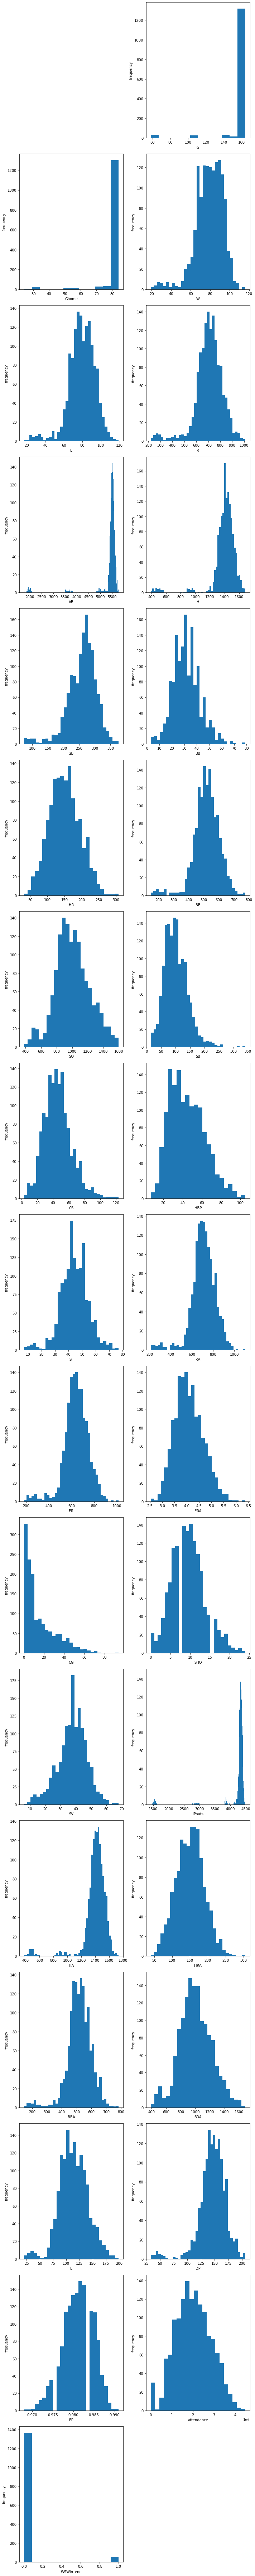

In [58]:
# Let's explore the distributions of the feature data

# configure max open warning
plt.rcParams.update({'figure.max_open_warning': 0})
cols = list(df_teams_no_NA.columns)
print(cols)

plt.figure(figsize=(10,100))
n = 1
for c in cols:
    if c != 'divID':
        plt.subplot((len(cols) - 1)//2 + 1, 2, n)
        plt.hist(df_teams_no_NA[c], bins = 'auto')
        plt.xlabel(c)
        plt.ylabel('frequency')
    n += 1

plt.tight_layout()
plt.show()

      divID    G  Ghome    W    L    R    AB     H   2B  3B  ...  IPouts  \
1541      0  162   81.0   76   86  736  5546  1495  215  24  ...    4292   
1542      2  162   81.0  108   54  792  5545  1424  213  25  ...    4436   
1543      2  162   81.0   87   75  786  5535  1450  252  28  ...    4339   
1544      0  162   81.0   86   76  631  5532  1391  197  40  ...    4387   
1545      0  162   84.0   56  106  633  5514  1394  192  20  ...    4291   

        HA  HRA  BBA   SOA    E   DP     FP  attendance  WSWin_enc  
1541  1451  185  478   960  141  118  0.977   1078848.0        0.0  
1542  1317  139  469   941  117  148  0.981   1057069.0        1.0  
1543  1391  156  594  1003  156  131  0.974   1595278.0        0.0  
1544  1280  154  559   922  127  169  0.980   1077741.0        0.0  
1545  1554  164  556   762  165  187  0.975    495355.0        0.0  

[5 rows x 33 columns]


<AxesSubplot:>

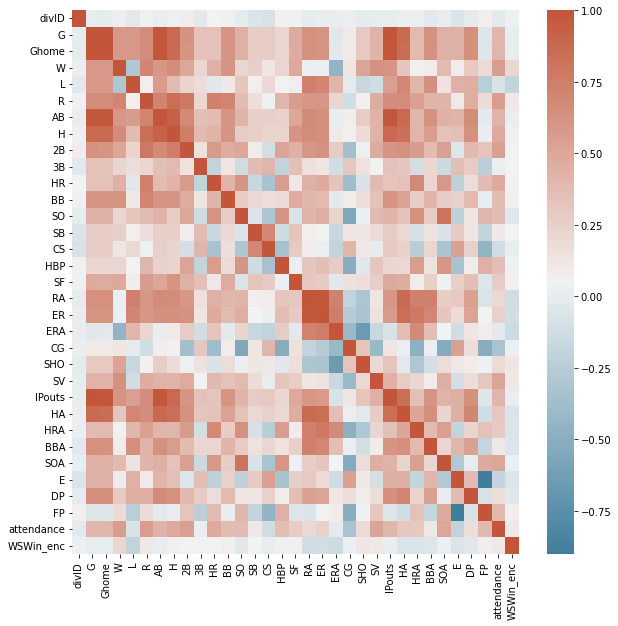

In [59]:
# check for multicollinearity (example: Wins, Losses, G, GHome...)

# Plot correlation matrix

df_temp = df_teams_no_NA.copy()

df_temp['divID'] = df_temp['divID'].map({'W': 0, 'C': 1, 'E': 2})
df_temp['divID'] = df_temp['divID'].astype('int64')
print(df_temp.head())
plt.figure(figsize=(10,10))
correlations = df_temp.corr()
sns.heatmap(correlations, cmap=sns.diverging_palette(230, 20, as_cmap=True))

In [60]:
# Univariate analysis for classification

from sklearn.feature_selection import SelectKBest, chi2

X = df_teams_no_NA.drop(['divID'], axis = 1).copy()
y = df_teams_no_NA['divID'].copy()

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
#summary_stats.sort_values(by = "p_value", inplace = True)
summary_stats

,input_variable,p_value,chi2_score
0,G,7.180841e-01,6.623371e-01
1,Ghome,8.076462e-01,4.272623e-01
2,W,2.981648e-05,2.084090e+01
3,L,1.591239e-03,1.288648e+01
4,R,7.355609e-39,1.756107e+02
5,AB,4.151888e-04,1.557355e+01
6,H,1.065759e-07,3.210882e+01
7,2B,3.198868e-120,5.502948e+02
8,3B,1.296105e-14,6.395366e+01
9,HR,1.574750e-133,6.115794e+02


In [61]:
# From the univariate test output, we can select only the features
# that do not exceed a threshold (let's say p=0.05)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new_uni = X[selected_variables]
print(list(X_new_uni.columns))

['W', 'L', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'attendance']


Optimal number of features: 10


C:\Users\zhrac\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


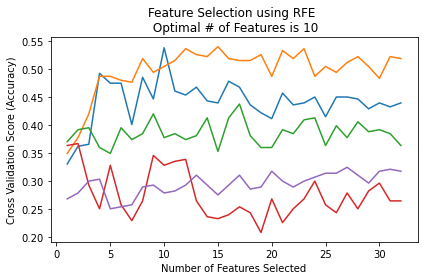

In [62]:
# Recursive Feature Elimination with Cross-Validation (RFECV)
# Iteratively removes variables with the weakest relationship with the output

# Also implements Cross-Validation, splitting the data and training on that
# splitted data

from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

feature_selector = RFECV(DecisionTreeClassifier())
fit = feature_selector.fit(X, y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_new_RFE = X.loc[:, feature_selector.get_support()]

plt.plot(
    range(1, len(fit.grid_scores_) + 1),
    fit.grid_scores_
)
plt.ylabel("Cross Validation Score (Accuracy)")
plt.xlabel("Number of Features Selected")
plt.title(f"Feature Selection using RFE \n Optimal # of Features is {optimal_feature_count}")
plt.tight_layout() 
plt.show()

In [63]:
RFE_outcome = pd.DataFrame({
    'Feature' : [X.columns[c] for c in range(X.shape[1])],
    'Selected' : [fit.support_[c] for c in range(X.shape[1])],
    'Rank' : [fit.ranking_[c] for c in range(X.shape[1])]
}).sort_values(by=['Rank'])
RFE_outcome

,Feature,Selected,Rank
25,BBA,True,1
19,CG,True,1
6,H,True,1
8,3B,True,1
26,SOA,True,1
10,BB,True,1
24,HRA,True,1
13,CS,True,1
14,HBP,True,1
30,attendance,True,1


In [64]:
# We can now compare the results of the following for each feature:
# Distribution
# Correlation matrix
# Univariate analysis
# Recursive Feature Elimination

# We can start by removing the categorical WSWin_enc feature as it
# was ranked the worst by RFECV, was not selected in univariate
# testing, and has minimal correlation with the target divID

#X.drop(['WSWin_enc'], axis = 1, inplace = True)
#df_temp.drop(['WSWin_enc'], axis = 1, inplace = True)
# Now we are working with only numerical features

# First, standardize data

scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X),
                        index = X.index,
                        columns = X.columns)

['G', 'Ghome', 'W', 'L', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'attendance', 'WSWin_enc']
Please enter a feature you want to analyze: G
Checking results for feature - G...


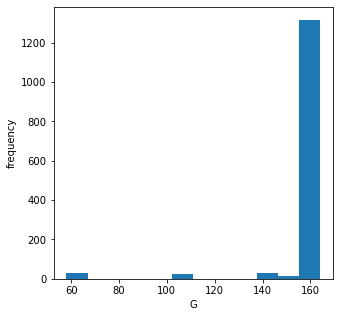

<Figure size 360x360 with 0 Axes>

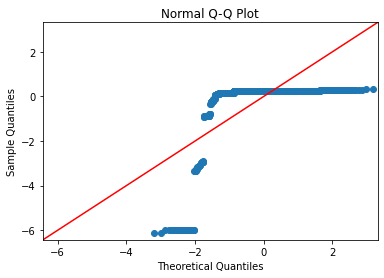

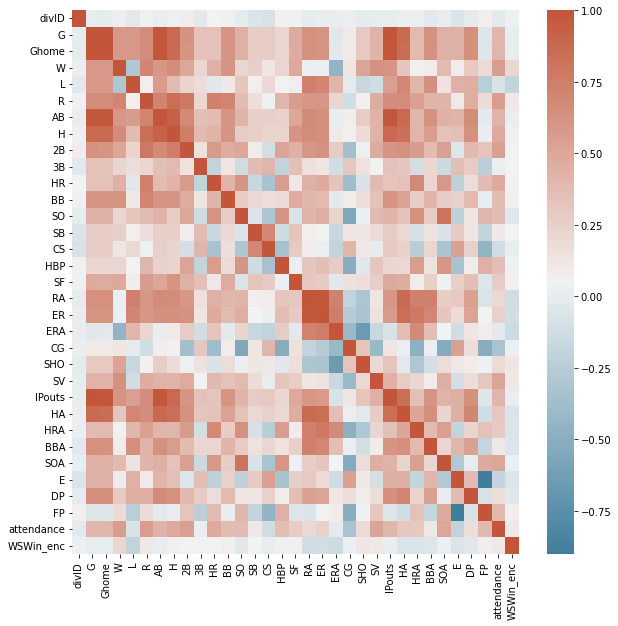

The feature G was NOT selected by univariate analysis.
Out of 32 features analyzed, 10 optimal features were found.
The feature G was NOT selected by RFECV out of all 32 features analyzed.


In [65]:
# Visualizing distributions and checking for normality using Q-Q plot
# (shows distribution of data against expected normal distribution)

print(list(X.columns))
c = input("Please enter a feature you want to analyze: ")
while c not in list(X.columns):
    c = input("Please try again (select one from the list above): ")
plt.figure(figsize=(5,5))
print(f"Checking results for feature - {c}...")
plt.hist(X[c], bins = 'auto')
plt.xlabel(c)
plt.ylabel('frequency')
plt.show()
plt.figure(figsize=(5,5))
sm.qqplot(X_scaled[c], line = '45')
plt.title('Normal Q-Q Plot')
plt.show()

# Correlation matrix section with heatmap

feature_corr = df_temp.corr()
#print(df_temp.dtypes)
plt.figure(figsize=(10,10))
sns.heatmap(feature_corr, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

# Univariate analysis result

if c in X_new_uni:
    print(f"The feature {c} was selected by univariate analysis.")
else:
    print(f"The feature {c} was NOT selected by univariate analysis.")

# RFE result

print(f"Out of {RFE_outcome.shape[0]} features analyzed, {optimal_feature_count} optimal features were found.")
if (RFE_outcome.loc[RFE_outcome['Feature'] == c]['Selected'] == True).values[0]:
    print(f"The feature {c} was selected by RFECV within the total {optimal_feature_count} optimal features.")
else:
    print(f"The feature {c} was NOT selected by RFECV out of all {RFE_outcome.shape[0]} features analyzed.")

<AxesSubplot:>

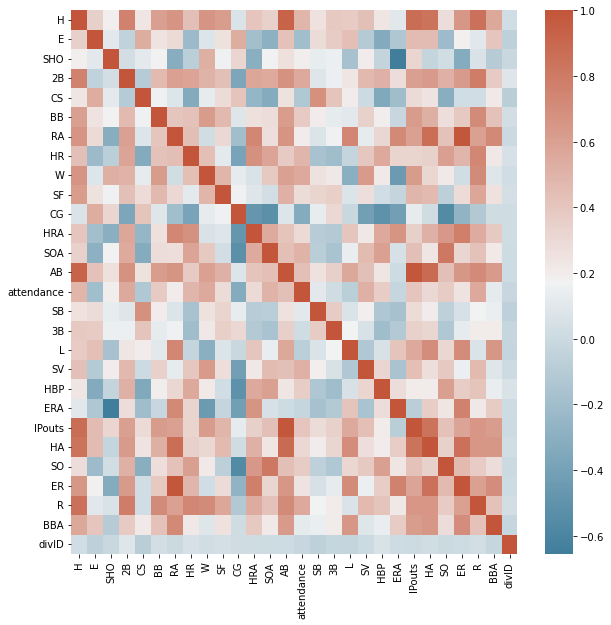

In [66]:
# Finally let's extract only the features we want to include in the model

extracted_features = list(set(list(X_new_uni.columns) + list(RFE_outcome[RFE_outcome['Selected'] == True]['Feature'].values))) # ignore duplicates
extracted_features.append(y.name)
target_var_name = y.name
plt.figure(figsize=(10,10))
feature_corr = df_temp[extracted_features].corr()
sns.heatmap(feature_corr, cmap=sns.diverging_palette(230, 20, as_cmap=True))

<AxesSubplot:>

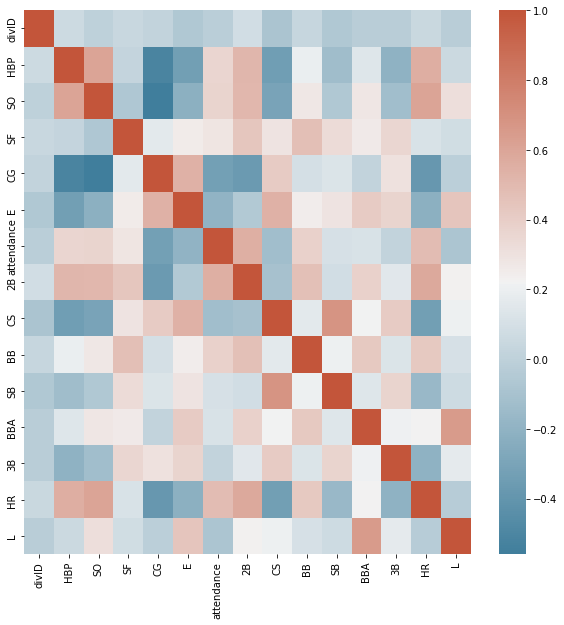

In [67]:
# Remove features with high multicollinearity

cols_to_remove = ['W', 'ER', 'SHO', 'H', 'ERA', 'R', 'RA', 'HRA', 'IPouts', 'HA', 'SV', 'AB', 'SOA']
extracted_features = list(set(extracted_features) - set(cols_to_remove))
plt.figure(figsize=(10,10))
feature_corr = df_temp[extracted_features].corr()
sns.heatmap(feature_corr, cmap=sns.diverging_palette(230, 20, as_cmap=True))

In [68]:
# Train Test Split

X_y_data = df_teams_no_NA[extracted_features].copy()
X = X_y_data.drop(target_var_name, axis = 1).copy()
y = X_y_data[target_var_name].copy()
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Begin K-nearest neighbors classification

In [69]:
X = df_teams_no_NA[extracted_features].drop(target_var_name, axis = 1).copy()
y = df_teams_no_NA[target_var_name].copy()
print(X.head())
print(y.head())

       HBP     SO    SF  CG    E  attendance   2B    CS     BB    SB  BBA  3B  \
1541  38.0  736.0  42.0  45  141   1078848.0  215  34.0  522.0  58.0  478  24   
1542  44.0  952.0  46.0  60  117   1057069.0  213  39.0  717.0  84.0  469  25   
1543  40.0  855.0  47.0  38  156   1595278.0  252  48.0  594.0  50.0  594  28   
1544  29.0  922.0  37.0  21  127   1077741.0  197  27.0  447.0  69.0  559  40   
1545  42.0  872.0  48.0  20  165    495355.0  192  33.0  477.0  53.0  556  20   

       HR    L  
1541  160   86  
1542  179   54  
1543  203   75  
1544  114   76  
1545  123  106  
1541    W
1542    E
1543    E
1544    W
1545    W
Name: divID, dtype: category
Categories (3, object): ['C', 'E', 'W']


In [70]:
# Standardize data first

scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.5809859154929577


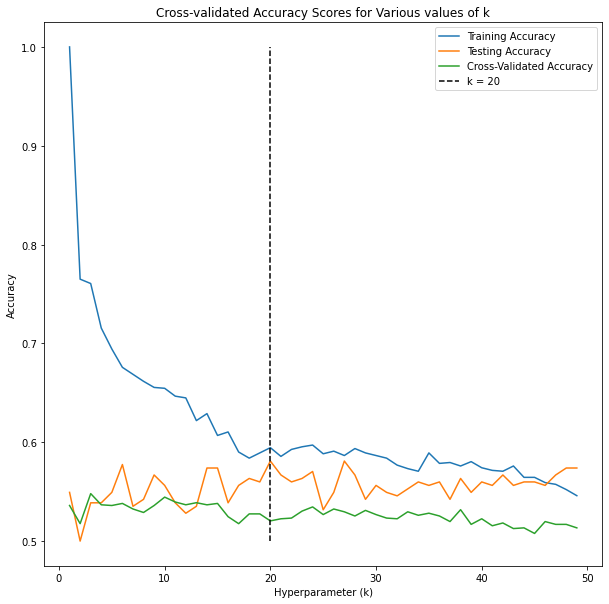

In [71]:
# Identify k-value that gives the best accuracy
# Implement k-Fold Cross-Validation

neighbors = np.arange(1, 50)
train_accs = np.empty(len(neighbors))
test_accs = np.empty(len(neighbors))
cross_val_accs = np.empty(len(neighbors))

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accs[k - 1] = knn.score(X_train, y_train)
    test_accs[k - 1] = knn.score(X_test, y_test)
    
    knn_cv = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(knn_cv,
                                X_scaled,
                                y,
                                cv = ms.KFold(shuffle = True,
                                              random_state = 42
                                             )
                               )
    cross_val_accs[k - 1] = np.mean(cv_scores)

# Plotting accuracies

plt.figure(figsize=(10,10))
plt.plot(neighbors, train_accs, label = 'Training Accuracy')
plt.plot(neighbors, test_accs, label = 'Testing Accuracy')
plt.plot(neighbors, cross_val_accs, label = 'Cross-Validated Accuracy')
plt.vlines(x = list(test_accs).index(max(test_accs)) + 1,
           ymin = min(np.hstack((train_accs, test_accs, cross_val_accs))),
           ymax = max(np.hstack((train_accs, test_accs, cross_val_accs))),
           colors = 'black',
           linestyle = 'dashed', label = f'k = {list(test_accs).index(max(test_accs)) + 1}')
plt.legend()
plt.xlabel('Hyperparameter (k)')
plt.ylabel('Accuracy')
plt.title('Cross-validated Accuracy Scores for Various values of k')
plt.show()

In [72]:
# Further Hyperparameter tuning using GridSearchCV

knn_new = KNeighborsClassifier()
k_range = np.arange(1,50,2)
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn_new,
                    param_grid,
                    scoring = 'accuracy',
                    return_train_score = False,
                    cv = 10)
grid_search = grid.fit(X_train, y_train)
print(grid_search.best_params_)
print(f"Accuracy for training dataset with tuning is {round(grid_search.best_score_ * 100, 3)}%")
print(classification_report(y_test, grid_search.predict(X_test)))
print(f"Accuracy for testing dataset with tuning is {round(grid_search.score(X_test, y_test) * 100, 3)}%")

{'n_neighbors': 9}
Accuracy for training dataset with tuning is 52.824%
              precision    recall  f1-score   support

           C       0.49      0.69      0.58        52
           E       0.63      0.53      0.57       129
           W       0.55      0.55      0.55       103

    accuracy                           0.57       284
   macro avg       0.56      0.59      0.57       284
weighted avg       0.58      0.57      0.57       284

Accuracy for testing dataset with tuning is 56.69%


In [73]:
# Training KNN with optimal k value with cross validation

knn_final = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])
cv_scores = cross_val_score(knn_final,
                            X_scaled,
                            y,
                            cv = ms.KFold(shuffle = True,
                                          random_state = 42
                                         )
                           )
print(f"Accuracy with cross validation: {round(np.mean(cv_scores) * 100, 3)}%")
knn_temp = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])
knn_temp.fit(X_train, y_train)
print(f"Accuracy for the testing dataset with tuning: {round(knn_temp.score(X_test, y_test) * 100, 3)}%")

Accuracy with cross validation: 53.6%
Accuracy for the testing dataset with tuning: 56.69%


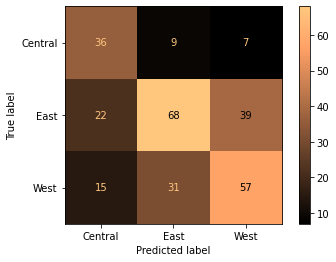

              precision    recall  f1-score   support

           C       0.49      0.69      0.58        52
           E       0.63      0.53      0.57       129
           W       0.55      0.55      0.55       103

    accuracy                           0.57       284
   macro avg       0.56      0.59      0.57       284
weighted avg       0.58      0.57      0.57       284



In [78]:
labels = np.array(['Central','East','West'])
conf_mat_disp = ConfusionMatrixDisplay.from_estimator(knn_temp,
                                                      X_test,
                                                      y_test,
                                                      display_labels = labels,
                                                      cmap = 'copper')
conf_mat = confusion_matrix(y_test, knn_temp.predict(X_test))
plt.show()
print(classification_report(y_test, knn_temp.predict(X_test)))

In [79]:
# Draw conclusions from confusion matrix output

print("Precision analysis\n")
print(f"Out of the teams predicted to be in the {labels[0]} Division, about {round((conf_mat[0,0]/np.sum(conf_mat[:,0])) * 100, 3)}% were actually in the {labels[0]} Division.")
print(f"Out of the teams predicted to be in the {labels[1]} Division, about {round((conf_mat[1,1]/np.sum(conf_mat[:,1])) * 100, 3)}% were actually in the {labels[1]} Division.")
print(f"Out of the teams predicted to be in the {labels[2]} Division, about {round((conf_mat[2,2]/np.sum(conf_mat[:,2])) * 100, 3)}% were actually in the {labels[2]} Division.\n")

print("Recall analysis\n")
print(f"Out of the teams actually in the {labels[0]} Division, about {round((conf_mat[0,0]/np.sum(conf_mat[0,:])) * 100, 3)}% were predicted correctly.")
print(f"Out of the teams actually in the {labels[1]} Division, about {round((conf_mat[1,1]/np.sum(conf_mat[1,:])) * 100, 3)}% were predicted correctly.")
print(f"Out of the teams actually in the {labels[2]} Division, about {round((conf_mat[2,2]/np.sum(conf_mat[2,:])) * 100, 3)}% were predicted correctly.\n")

Precision analysis

Out of the teams predicted to be in the Central Division, about 49.315% were actually in the Central Division.
Out of the teams predicted to be in the East Division, about 62.963% were actually in the East Division.
Out of the teams predicted to be in the West Division, about 55.34% were actually in the West Division.

Recall analysis

Out of the teams actually in the Central Division, about 69.231% were predicted correctly.
Out of the teams actually in the East Division, about 52.713% were predicted correctly.
Out of the teams actually in the West Division, about 55.34% were predicted correctly.



From the confusion matrix output, we can see that the K-nearest neighbors classifier had an easier time classifying the Central division than the East and West Divisions. Also, between the East and West Divisons, the East Division was slightly more accurate despite there being a relatively equal number teams in the East and West Divisions in the input data.

## Ways to improve the model in the future

Consider the year in which the MLB team competed. There may have been more East and West Division teams in earlier time periods than Central Division teams as baseball started in New England and spread to the West. For example, each division has had five teams. The most recent change took place after the 2012 season, when the Houston Astros moved to the AL West division.

We should also consider the potential bias of including more East and West Division teams in the model than Central teams (earlier we found that there were about twice as many teams within the East and West divisions as there teams in the Central division).

In [83]:
# Gathering Data

# Collecting only first 10,000 datapoints

filepath = 'datasets/pitches_reduced.csv'
df_teams = pd.read_csv(filepath, header = 0)

In [84]:
# retain relevant features for the model, ignoring data we don't want to include in the model

df_teams_red = df_teams[['px','pz','start_speed','end_speed','spin_rate','spin_dir',
                         'ax','ay','az','vx0','vy0','vz0','pitch_type']].copy()
df_teams_red

,px,pz,start_speed,end_speed,spin_rate,spin_dir,ax,ay,az,vx0,vy0,vz0,pitch_type
0,0.416,2.963,92.9,84.1,2305.052,159.235,7.665,34.685,-11.960,-6.409,-136.065,-3.995,FF
1,-0.191,2.347,92.8,84.1,2689.935,151.402,12.043,34.225,-10.085,-8.411,-135.690,-5.980,FF
2,-0.518,3.284,94.1,85.2,2647.972,145.125,14.368,35.276,-11.560,-9.802,-137.668,-3.337,FF
3,-0.641,1.221,91.0,84.0,1289.590,169.751,2.104,28.354,-20.540,-8.071,-133.005,-6.567,FF
4,-1.821,2.083,75.4,69.6,1374.569,280.671,-10.280,21.774,-34.111,-6.309,-110.409,0.325,CU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.694,1.812,89.1,82.0,2026.031,202.038,-6.837,28.124,-15.285,2.900,-130.471,-7.105,FF
9996,-0.395,1.884,82.0,75.7,1511.880,255.447,-12.119,23.992,-29.028,4.912,-120.147,-2.744,CH
9997,0.354,1.794,81.3,76.4,90.711,147.955,0.395,19.630,-31.543,4.172,-119.061,-2.802,SL
9998,1.197,3.766,89.8,82.8,2077.966,194.148,-4.603,27.007,-13.915,5.775,-131.468,-3.560,FF


In [85]:
# Data preprocessing

# (remove NaN values)

# Remove data where the pitch type does not exist

df_teams_no_NA = df_teams_red[df_teams_red['pitch_type'].isna() == False].copy()
df_teams_no_NA

,px,pz,start_speed,end_speed,spin_rate,spin_dir,ax,ay,az,vx0,vy0,vz0,pitch_type
0,0.416,2.963,92.9,84.1,2305.052,159.235,7.665,34.685,-11.960,-6.409,-136.065,-3.995,FF
1,-0.191,2.347,92.8,84.1,2689.935,151.402,12.043,34.225,-10.085,-8.411,-135.690,-5.980,FF
2,-0.518,3.284,94.1,85.2,2647.972,145.125,14.368,35.276,-11.560,-9.802,-137.668,-3.337,FF
3,-0.641,1.221,91.0,84.0,1289.590,169.751,2.104,28.354,-20.540,-8.071,-133.005,-6.567,FF
4,-1.821,2.083,75.4,69.6,1374.569,280.671,-10.280,21.774,-34.111,-6.309,-110.409,0.325,CU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.694,1.812,89.1,82.0,2026.031,202.038,-6.837,28.124,-15.285,2.900,-130.471,-7.105,FF
9996,-0.395,1.884,82.0,75.7,1511.880,255.447,-12.119,23.992,-29.028,4.912,-120.147,-2.744,CH
9997,0.354,1.794,81.3,76.4,90.711,147.955,0.395,19.630,-31.543,4.172,-119.061,-2.802,SL
9998,1.197,3.766,89.8,82.8,2077.966,194.148,-4.603,27.007,-13.915,5.775,-131.468,-3.560,FF


In [86]:
# Let's count how many pitch types we have for each division played over all years

pitch_types = list(set(df_teams_no_NA['pitch_type']))
pitch_freq_dict = {}
for p in pitch_types:
    pitch_freq_dict[p] = df_teams_no_NA[df_teams_no_NA['pitch_type'] == p].shape[0]
print(pitch_freq_dict)

# Remove pitch types that are rare

threshold = 100
pitch_types_to_remove = []
for key, value in pitch_freq_dict.items():
    if value < 100:
        pitch_types_to_remove.append(key)
print(pitch_types)
print(pitch_types_to_remove)

{'FO': 2, 'PO': 3, 'FF': 3444, 'KC': 175, 'EP': 2, 'SI': 987, 'IN': 57, 'FT': 1387, 'FS': 162, 'SL': 1506, 'CU': 736, 'FC': 553, 'CH': 972}
['FO', 'PO', 'FF', 'KC', 'EP', 'SI', 'IN', 'FT', 'FS', 'SL', 'CU', 'FC', 'CH']
['FO', 'PO', 'EP', 'IN']


In [88]:
for p in pitch_types_to_remove:
    df_teams_no_NA.drop(df_teams_no_NA[df_teams_no_NA['pitch_type'] == p].index, inplace = True)
print(set(df_teams_no_NA['pitch_type']))
df_teams_no_NA

{'FF', 'KC', 'SI', 'FT', 'FS', 'SL', 'CU', 'FC', 'CH'}


,px,pz,start_speed,end_speed,spin_rate,spin_dir,ax,ay,az,vx0,vy0,vz0,pitch_type
0,0.416,2.963,92.9,84.1,2305.052,159.235,7.665,34.685,-11.960,-6.409,-136.065,-3.995,FF
1,-0.191,2.347,92.8,84.1,2689.935,151.402,12.043,34.225,-10.085,-8.411,-135.690,-5.980,FF
2,-0.518,3.284,94.1,85.2,2647.972,145.125,14.368,35.276,-11.560,-9.802,-137.668,-3.337,FF
3,-0.641,1.221,91.0,84.0,1289.590,169.751,2.104,28.354,-20.540,-8.071,-133.005,-6.567,FF
4,-1.821,2.083,75.4,69.6,1374.569,280.671,-10.280,21.774,-34.111,-6.309,-110.409,0.325,CU
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.694,1.812,89.1,82.0,2026.031,202.038,-6.837,28.124,-15.285,2.900,-130.471,-7.105,FF
9996,-0.395,1.884,82.0,75.7,1511.880,255.447,-12.119,23.992,-29.028,4.912,-120.147,-2.744,CH
9997,0.354,1.794,81.3,76.4,90.711,147.955,0.395,19.630,-31.543,4.172,-119.061,-2.802,SL
9998,1.197,3.766,89.8,82.8,2077.966,194.148,-4.603,27.007,-13.915,5.775,-131.468,-3.560,FF


In [90]:
# Check for NA values

df_teams_no_NA.dropna(inplace = True)
print(df_teams_no_NA.isna().sum())
print(df_teams_no_NA.shape)

px             0
pz             0
start_speed    0
end_speed      0
spin_rate      0
spin_dir       0
ax             0
ay             0
az             0
vx0            0
vy0            0
vz0            0
pitch_type     0
dtype: int64
(9922, 13)


      px     pz  start_speed  end_speed  spin_rate  spin_dir      ax      ay  \
0  0.416  2.963         92.9       84.1   2305.052   159.235   7.665  34.685   
1 -0.191  2.347         92.8       84.1   2689.935   151.402  12.043  34.225   
2 -0.518  3.284         94.1       85.2   2647.972   145.125  14.368  35.276   
3 -0.641  1.221         91.0       84.0   1289.590   169.751   2.104  28.354   
4 -1.821  2.083         75.4       69.6   1374.569   280.671 -10.280  21.774   

       az    vx0      vy0    vz0  pitch_type  
0 -11.960 -6.409 -136.065 -3.995           0  
1 -10.085 -8.411 -135.690 -5.980           0  
2 -11.560 -9.802 -137.668 -3.337           0  
3 -20.540 -8.071 -133.005 -6.567           0  
4 -34.111 -6.309 -110.409  0.325           6  


<AxesSubplot:>

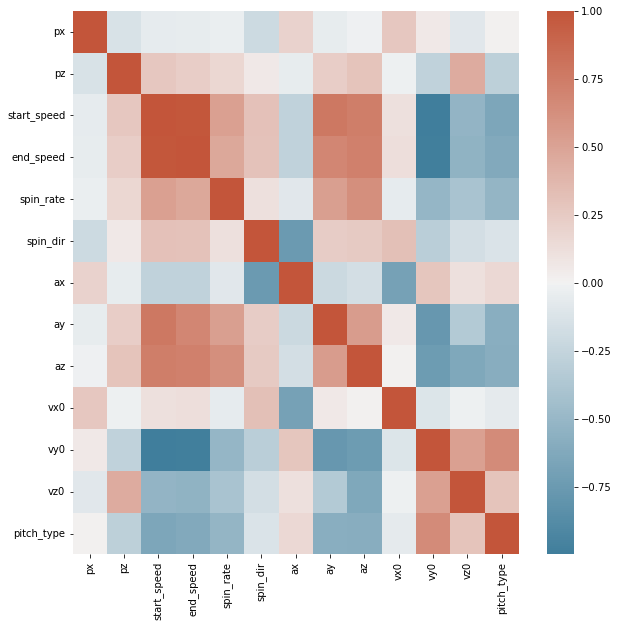

In [92]:
# check for multicollinearity (example: Wins, Losses, G, GHome...)

# Plot correlation matrix

df_temp = df_teams_no_NA.copy()
temp_dict = {}
count = 0
for p in set(df_teams_no_NA['pitch_type']):
    temp_dict[p] = count
    count += 1
df_temp['pitch_type'] = df_temp['pitch_type'].map(temp_dict)
df_temp['pitch_type'] = df_temp['pitch_type'].astype('int64')

print(df_temp.head())
plt.figure(figsize=(10,10))
correlations = df_temp.corr()
sns.heatmap(correlations, cmap=sns.diverging_palette(230, 20, as_cmap=True))

<AxesSubplot:>

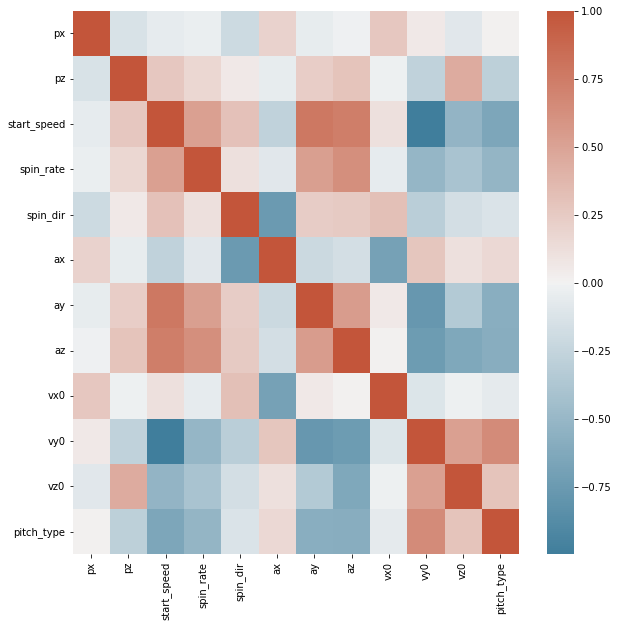

In [93]:
# Finally let's extract only the features we want to include in the model (avoid high multicollinearity)

X = df_teams_no_NA.drop('pitch_type', axis = 1).copy()
y = df_teams_no_NA['pitch_type']
extracted_features = ['px','pz','start_speed','spin_rate','spin_dir','ax','ay','az','vx0','vy0','vz0']
extracted_features.append(y.name)
target_var_name = y.name
plt.figure(figsize=(10,10))
feature_corr = df_temp[extracted_features].corr()
sns.heatmap(feature_corr, cmap=sns.diverging_palette(230, 20, as_cmap=True))

In [94]:
X = df_teams_no_NA[extracted_features].drop(target_var_name, axis = 1).copy()
y = df_teams_no_NA[target_var_name].copy()
print(X.head())
print(y.head())

      px     pz  start_speed  spin_rate  spin_dir      ax      ay      az  \
0  0.416  2.963         92.9   2305.052   159.235   7.665  34.685 -11.960   
1 -0.191  2.347         92.8   2689.935   151.402  12.043  34.225 -10.085   
2 -0.518  3.284         94.1   2647.972   145.125  14.368  35.276 -11.560   
3 -0.641  1.221         91.0   1289.590   169.751   2.104  28.354 -20.540   
4 -1.821  2.083         75.4   1374.569   280.671 -10.280  21.774 -34.111   

     vx0      vy0    vz0  
0 -6.409 -136.065 -3.995  
1 -8.411 -135.690 -5.980  
2 -9.802 -137.668 -3.337  
3 -8.071 -133.005 -6.567  
4 -6.309 -110.409  0.325  
0    FF
1    FF
2    FF
3    FF
4    CU
Name: pitch_type, dtype: object


In [95]:
# Standardize data first

scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))
print(X_train.shape)
print(X_train[0:5])
temp = [1]*11
print(knn.predict([temp]))

0.7541561712846347
(7937, 11)
[[ 1.9146979  -1.69558885 -0.62353062 -2.28111032  2.40607347  0.18710393
  -0.81490286 -1.2712      1.55493419  0.67684279 -0.23796219]
 [-0.19878452 -1.84262901 -0.97592399  0.25560623 -1.44404929  1.75609711
  -0.92752144 -1.13690574 -0.4534284   0.96572071  0.01167484]
 [ 1.87466982 -0.41301224 -0.48257327 -0.65444141 -1.37085959  1.32110218
   0.97786319 -1.0018552   0.42399616  0.48054151  0.19073387]
 [-1.53686592 -0.3926198   0.06363645  0.33985648  0.69800419 -1.03058627
   0.30987814  0.21565246  0.30006016 -0.06183165 -0.88786803]
 [-0.82322251  0.69569206  0.57460683 -0.2964441  -0.48227522  0.90042541
   0.49367353  0.3490824  -1.83999545 -0.57839482  0.20282362]]
['FF']


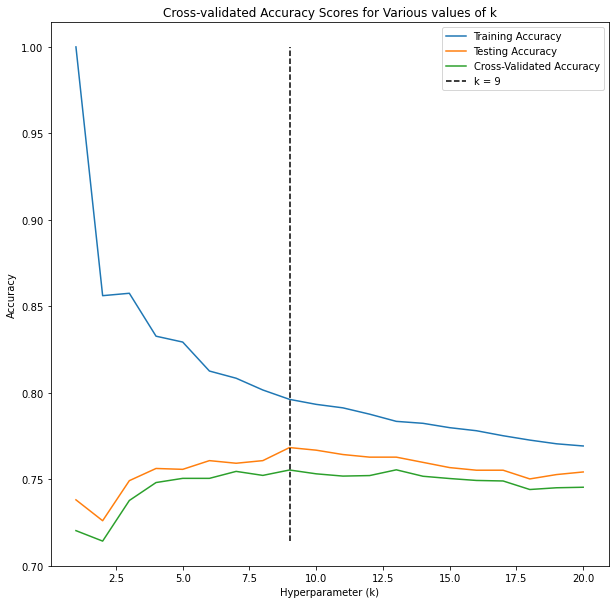

In [96]:
# Identify k-value that gives the best accuracy
# Implement k-Fold Cross-Validation

neighbors = np.arange(1, 21)
train_accs = np.empty(len(neighbors))
test_accs = np.empty(len(neighbors))
cross_val_accs = np.empty(len(neighbors))

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accs[k - 1] = knn.score(X_train, y_train)
    test_accs[k - 1] = knn.score(X_test, y_test)
    
    knn_cv = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(knn_cv,
                                X_scaled,
                                y,
                                cv = ms.KFold(shuffle = True,
                                              random_state = 42
                                             )
                               )
    cross_val_accs[k - 1] = np.mean(cv_scores)

# Plotting accuracies

plt.figure(figsize=(10,10))
plt.plot(neighbors, train_accs, label = 'Training Accuracy')
plt.plot(neighbors, test_accs, label = 'Testing Accuracy')
plt.plot(neighbors, cross_val_accs, label = 'Cross-Validated Accuracy')
plt.vlines(x = list(test_accs).index(max(test_accs)) + 1,
           ymin = min(np.hstack((train_accs, test_accs, cross_val_accs))),
           ymax = max(np.hstack((train_accs, test_accs, cross_val_accs))),
           colors = 'black',
           linestyle = 'dashed', label = f'k = {list(test_accs).index(max(test_accs)) + 1}')
plt.legend()
plt.xlabel('Hyperparameter (k)')
plt.ylabel('Accuracy')
plt.title('Cross-validated Accuracy Scores for Various values of k')
plt.show()

In [97]:
# Training KNN with optimal k value with cross validation

knn_temp = KNeighborsClassifier(n_neighbors = 9)
knn_temp.fit(X_train, y_train)
print(knn_temp.score(X_test, y_test))

0.7682619647355163


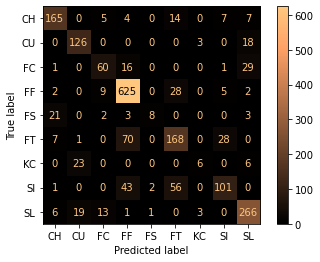

              precision    recall  f1-score   support

          CH       0.81      0.82      0.81       202
          CU       0.75      0.86      0.80       147
          FC       0.67      0.56      0.61       107
          FF       0.82      0.93      0.87       671
          FS       0.73      0.22      0.33        37
          FT       0.63      0.61      0.62       274
          KC       0.50      0.17      0.26        35
          SI       0.71      0.50      0.59       203
          SL       0.80      0.86      0.83       309

    accuracy                           0.77      1985
   macro avg       0.71      0.61      0.64      1985
weighted avg       0.76      0.77      0.76      1985



In [98]:
conf_mat_disp = ConfusionMatrixDisplay.from_estimator(knn_temp,
                                                      X_test,
                                                      y_test,
                                                      cmap = 'copper')
plt.show()
print(classification_report(y_test, knn_temp.predict(X_test)))